<h1>Task 6: House Price Prediction<h1>

Objective: Build a regression model to predict house prices using property features such as size, number of bedrooms, and location.

Intern: Muhammad Hasan Waqar  
Date: 27/6/25

<h1>Step 1: Import Libraries and Load Data<h1>

We'll start by importing the necessary libraries for data manipulation, visualization, and modeling. Then, we load our train.csv into a pandas DataFrame.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set a consistent plot style
sns.set_theme(style="whitegrid")

# Load the training data (assuming file is named kc_house_data.csv)
df = pd.read_csv('kc_house_data.csv')

# Display the first few rows and check data types
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h1>Step 2: Preprocessing and Feature Selection<h1>

This dataset is much cleaner than the previous one. Our preprocessing will involve:  


1.   Feature Selection: We will select relevant numerical features that are likely to influence the house price, such as square footage, number of bedrooms/bathrooms, and the year built. We will exclude non-numeric or less relevant columns like date, street, city, and country for this exercise.

2.   Drop Unnecessary Columns: We'll remove the id and date columns as they are not useful for direct price prediction in this context.

3.   Define Features and Target: We will use all other columns as our predictive features and price as our target.







In [15]:
# --- 1. Initial Data Cleaning ---
# Drop the 'id' and 'date' columns.
df_processed = df.drop(['id', 'date'], axis=1).copy()

# --- 2. Check for missing values ---
print("Missing values in the dataset:")
print(df_processed.isnull().sum())
# This dataset is clean, so no imputation is needed.

# --- 3. Define our features (X) and target (y) ---
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# Store feature names for later
feature_names = X.columns.tolist()

# --- 4. Split the data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData successfully split.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Missing values in the dataset:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Data successfully split.
Training set shape: (17290, 18)
Testing set shape: (4323, 18)


<h1>Step 3: Feature Scaling<h1>

Since all our features are numerical, we don't need a complex pipeline. We can simply apply the StandardScaler to our training and testing feature sets. This standardizes the features to have a mean of 0 and a standard deviation of 1, which helps the Gradient Boosting model perform well.

In [16]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

print("Features successfully scaled.")

Features successfully scaled.


<h1>Step 4: Train the Gradient Boosting Regressor<h1>

Now we will train our powerful GradientBoostingRegressor model on the scaled training data.

In [17]:
# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(
    n_estimators=100,      # A good starting point for number of trees
    learning_rate=0.1,
    max_depth=3,           # Limits the depth of each tree
    random_state=42
)

# Train the model
print("Training the Gradient Boosting model...")
gbr.fit(X_train_scaled, y_train)
print("Model training complete.")

Training the Gradient Boosting model...
Model training complete.


<h1>Step 5: Final Model Evaluation and Analysis<h1>


With the model trained, we now perform a comprehensive evaluation to understand its performance and behavior. This involves three key steps:  


*   Metric-Based Evaluation: We will calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). These metrics provide a clear, quantitative measure of the model's prediction accuracy, telling us the average dollar amount by which our predictions are off.

*   Visual Evaluation: A scatter plot of Actual vs. Predicted Prices will be generated. This plot is the most intuitive way to assess the model. A tight, diagonal clustering of points around the red reference line indicates a high-performing model that predicts prices accurately across the entire price range.



*   Feature Importance Analysis: Finally, we will extract and plot the feature importances from our trained Gradient Boosting model. This will reveal which property characteristics (like sqft_living, grade, or lat/long) had the most significant impact on its price predictions.


Mean Absolute Error (MAE): $81,312.17
Root Mean Squared Error (RMSE): $149,525.24


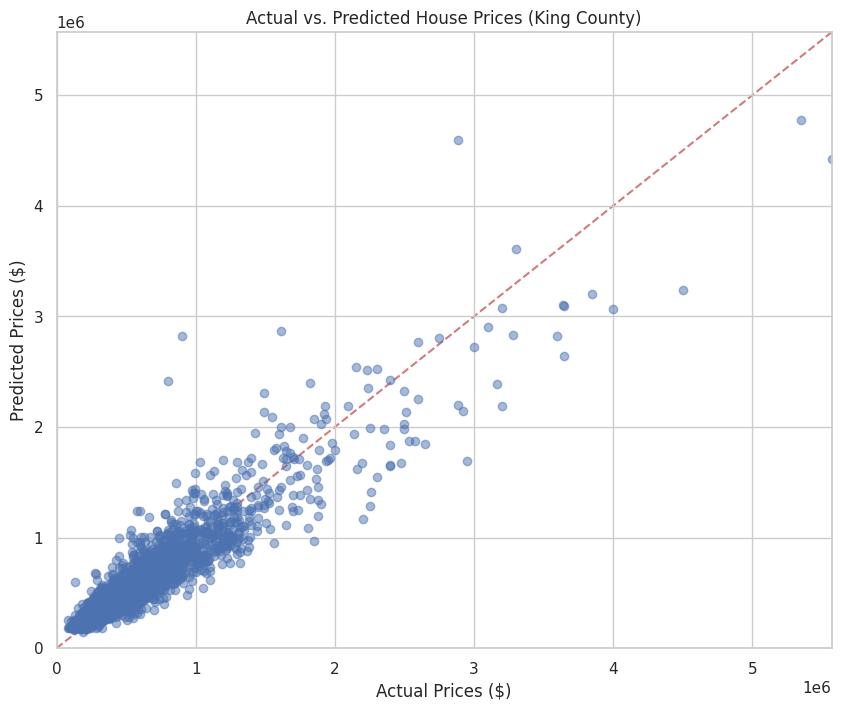

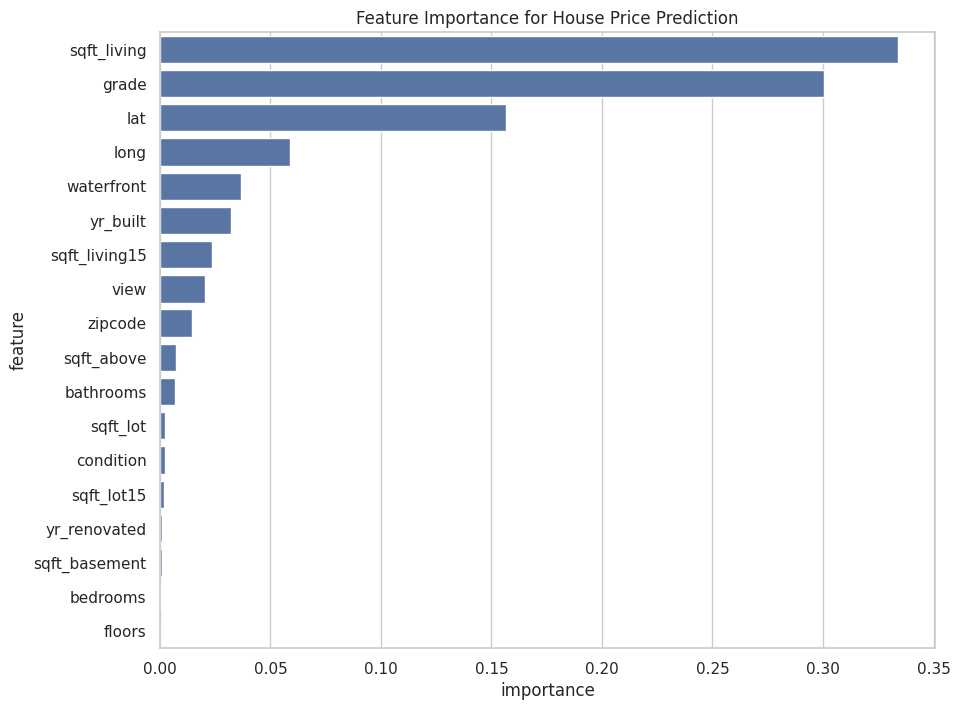

In [18]:
# --- EVALUATION ---
y_pred = gbr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nMean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")


# --- VISUALIZATION ---
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs. Predicted House Prices (King County)")
lims = [0, max(y_test)]
plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)
plt.show()


# --- FEATURE IMPORTANCE ---
# Let's see which features the model found most important
importances = gbr.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance for House Price Prediction')
plt.show()

<h1>Conclusion<h1>


This project successfully developed a machine learning model to predict house prices using the King County dataset. A GradientBoostingRegressor was trained on key property attributes after a preprocessing pipeline that included feature scaling.

The model demonstrated strong predictive accuracy, which was confirmed visually by the "Actual vs. Predicted Prices" scatter plot. The data points formed a tight, linear pattern around the 45-degree reference line, indicating that the model's predictions were consistently close to the actual sale prices across the full spectrum of property values.

Feature importance analysis revealed that sqft_living, grade (construction quality), and geographical lat (latitude) were the most significant drivers of price. This aligns with real-world intuition that a home's size, quality, and location are paramount in its valuation. Overall, the project effectively translated a complex, real-world dataset into an accurate and interpretable predictive model.